## Data Exploration and Cleaning

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
current_path = os.getcwd()
sales = pd.read_csv(os.getcwd() + '/supermarket_sales - Sheet1.csv')

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Check number of rows and columns
sales.shape

(1000, 17)

In [5]:
# check feature columns
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
#renaming columns
sales = sales.rename(columns = {'Invoice ID': 'invoice_id', 'Branch': 'branch', 'City': 'city', 'Customer type':
                                         'customer_type', 'Gender': 'gender', 'Product line': 'product_line', 'Unit price':
                                         'unit_price', 'Quantity': 'quantity', 'Tax 5%': 'tax_5%', 'Total': 'total_price',
                                         'Date': 'date', 'Time': 'time', 'Payment': 'payment_method', 'cogs': 
                                          'cost_of_goods_sold', 'gross margin percentage': 'gross_margin_percentage', 
                                          'gross income': 'gross_income', 'Rating': 'customer_rating'})

In [7]:
sales.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total_price,date,time,payment_method,cost_of_goods_sold,gross_margin_percentage,gross_income,customer_rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
sales.dtypes

invoice_id                  object
branch                      object
city                        object
customer_type               object
gender                      object
product_line                object
unit_price                 float64
quantity                     int64
tax_5%                     float64
total_price                float64
date                        object
time                        object
payment_method              object
cost_of_goods_sold         float64
gross_margin_percentage    float64
gross_income               float64
customer_rating            float64
dtype: object

In [9]:
# date column here is an object type, let's convert into Datetime
sales['date'] = pd.to_datetime(sales['date'])

In [10]:
sales['date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [11]:
sales.dtypes

invoice_id                         object
branch                             object
city                               object
customer_type                      object
gender                             object
product_line                       object
unit_price                        float64
quantity                            int64
tax_5%                            float64
total_price                       float64
date                       datetime64[ns]
time                               object
payment_method                     object
cost_of_goods_sold                float64
gross_margin_percentage           float64
gross_income                      float64
customer_rating                   float64
dtype: object

In [12]:
# statistical summary of sales data
sales.describe()

,unit_price,quantity,tax_5%,total_price,cost_of_goods_sold,gross_margin_percentage,gross_income,customer_rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [13]:
# Check for null values
sales.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total_price                0
date                       0
time                       0
payment_method             0
cost_of_goods_sold         0
gross_margin_percentage    0
gross_income               0
customer_rating            0
dtype: int64

## Exploratory Data Analysis

In [14]:
# Table showing which branch/customer type produced the most sales
customer_type = sales.groupby(['branch', 'customer_type']).total_price.sum().round(2).to_frame().reset_index()
customer_type

,branch,customer_type,total_price
0,A,Member,53637.48
1,A,Normal,52562.89
2,B,Member,53704.69
3,B,Normal,52492.99
4,C,Member,56881.28
5,C,Normal,53687.42


In [15]:
# Pivot table showing total sales per branch for members and non-members
customer_type_pivot = customer_type.pivot_table(columns='customer_type', index='branch', 
                                                values='total_price').reset_index()
customer_type_pivot

customer_type,branch,Member,Normal
0,A,53637.48,52562.89
1,B,53704.69,52492.99
2,C,56881.28,53687.42


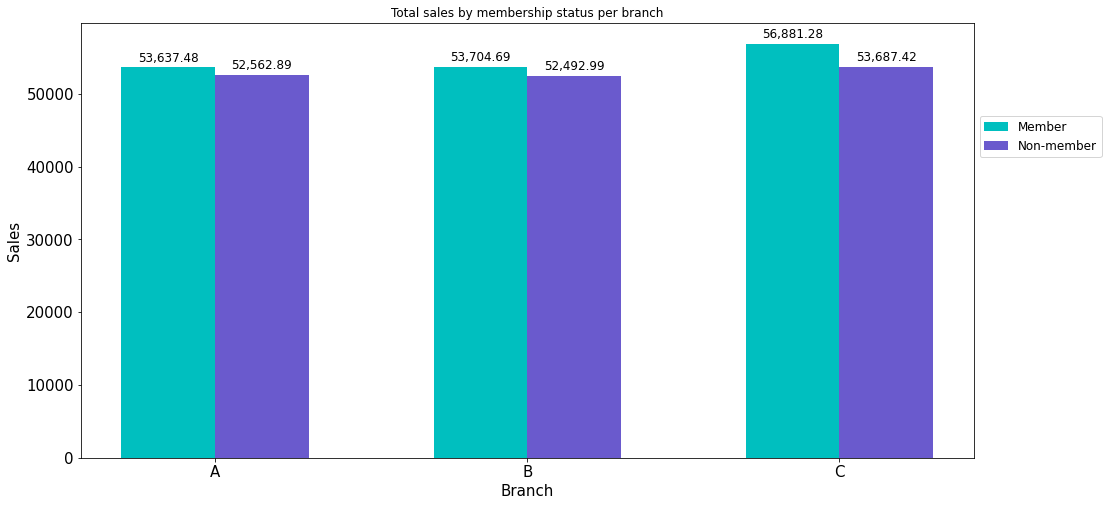

In [16]:
# plotting barchart of total sales per branch by customer type
y_member = customer_type_pivot.Member
y_normal = customer_type_pivot.Normal

xlabels = customer_type_pivot.branch # labels
x = np.arange(len(xlabels)) # label locatinos
bar_width = 0.3 # width of the bars

# Plotting individual bars
fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x - bar_width/2, y_member, bar_width, color = 'c', label='Member')
rects2 = ax.bar(x + bar_width/2, y_normal, bar_width, color = 'slateblue', label='Normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales', fontsize=15)
ax.set_xlabel('Branch', fontsize=15)
ax.set_title('Total Sales by customer type and branch')
ax.set_xticks(x)
ax.set_xticklabels(xlabels, fontsize=15)
plt.yticks(fontsize=15)
ax.legend()

#adding a label to each bar
def label(bars):
    for bar in bars:
        height = bar.get_height()
        # the '{:,}' command adds a thousand separator to the labels
        ax.annotate('{:,}'.format(height),\
                   xy = (bar.get_x() + bar.get_width() / 2, height), \
                   # shows label position on x and y axis
                   xytext = (0, 3), \
                   textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)

# label the sales for each bar
label(rects1)
label(rects2)

# bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((rects1, rects2), ('Member', 'Non-member'), bbox_to_anchor = (1.0, 0.8), fontsize = 12)

plt.title('Total sales by membership status per branch', fontsize = 12, y = 1.0)
plt.tight_layout
plt.savefig('customer_type_sales')

In [17]:
# Table showing which branch/method produced the most sales by grouping payment methods
payment_method_table = sales.groupby(['branch', 'payment_method']).total_price.sum().round(2).to_frame().reset_index()
payment_method_table

,branch,payment_method,total_price
0,A,Cash,33781.25
1,A,Credit card,33094.75
2,A,Ewallet,39324.37
3,B,Cash,35339.46
4,B,Credit card,37344.86
5,B,Ewallet,33513.35
6,C,Cash,43085.86
7,C,Credit card,30327.46
8,C,Ewallet,37155.38


In [18]:
# Pivot table showing total sales per branch for each payment method
payment_method_pivot = payment_method_table.pivot_table(columns='payment_method', index='branch', 
                                                values='total_price').reset_index()
payment_method_pivot

payment_method,branch,Cash,Credit card,Ewallet
0,A,33781.25,33094.75,39324.37
1,B,35339.46,37344.86,33513.35
2,C,43085.86,30327.46,37155.38


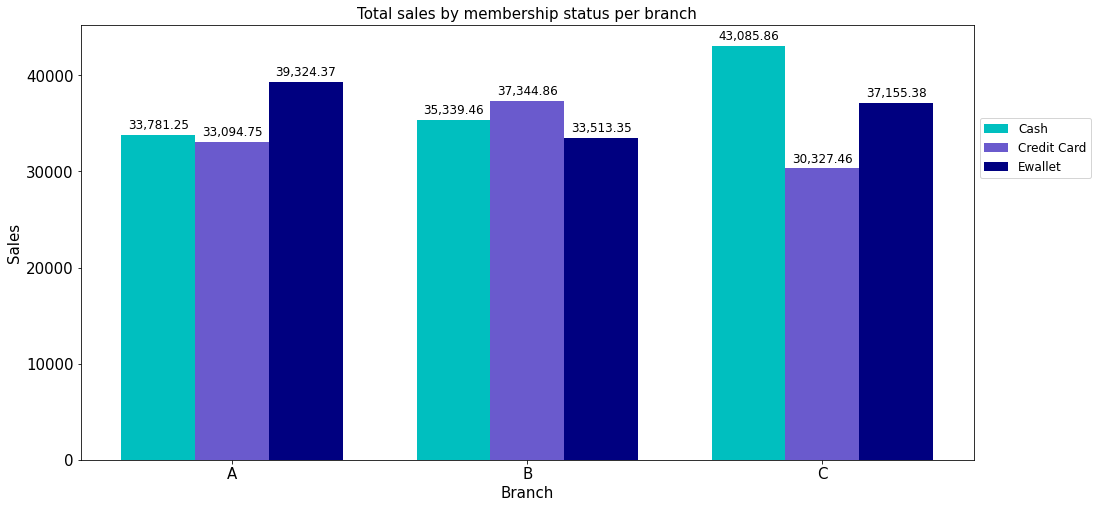

In [19]:
# plotting barchart of total sales per branch by payment method

y_cash = payment_method_pivot['Cash']
y_creditcard = payment_method_pivot['Credit card']
y_ewallet = payment_method_pivot['Ewallet']

xlabels = payment_method_pivot.branch # labels
x = np.arange(len(xlabels)) # label locations
bar_width = 0.25# width of the bars

# Plotting individual bars
fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x, y_cash, bar_width, color = 'c', label='Member')
rects2 = ax.bar(x + 0.25, y_creditcard, bar_width, color = 'slateblue', label='Normal')
rects3 = ax.bar(x + 0.5, y_ewallet, bar_width, color = 'navy', label='Normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales', fontsize=15)
ax.set_xlabel('Branch', fontsize=15)
ax.set_title('Total Sales by payment method and branch')
ax.set_xticks(x + (bar_width * 2) / 2)
ax.set_xticklabels(xlabels, fontsize=15)
plt.yticks(fontsize=15)

ax.legend()
        
# label the sales for each bar    
label(rects1)
label(rects2)
label(rects3)

# bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((rects1, rects2, rects3), ('Cash', 'Credit Card', 'Ewallet'), bbox_to_anchor = (1.0, 0.8), fontsize = 12)

plt.title('Total sales by membership status per branch', fontsize = 15, y = 1.0)
plt.tight_layout
plt.savefig('payment_method_sales')

In [20]:
# Table showing which branch produced the most sales by grouping product line
product_line_table = sales.groupby(['branch', 'product_line']).total_price.sum().round(2).to_frame().reset_index()
product_line_table

,branch,product_line,total_price
0,A,Electronic accessories,18317.11
1,A,Fashion accessories,16332.51
2,A,Food and beverages,17163.10
3,A,Health and beauty,12597.75
4,A,Home and lifestyle,22417.20
5,A,Sports and travel,19372.70
6,B,Electronic accessories,17051.44
7,B,Fashion accessories,16413.32
8,B,Food and beverages,15214.89
9,B,Health and beauty,19980.66


In [21]:
# Pivot table showing total sales per branch for each product available
product_line_pivot = product_line_table.pivot_table(columns='product_line', index='branch', 
                                                values='total_price').reset_index()
product_line_pivot

product_line,branch,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,A,18317.11,16332.51,17163.10,12597.75,22417.20,19372.70
1,B,17051.44,16413.32,15214.89,19980.66,17549.16,19988.20
2,C,18968.97,21560.07,23766.85,16615.33,13895.55,15761.93


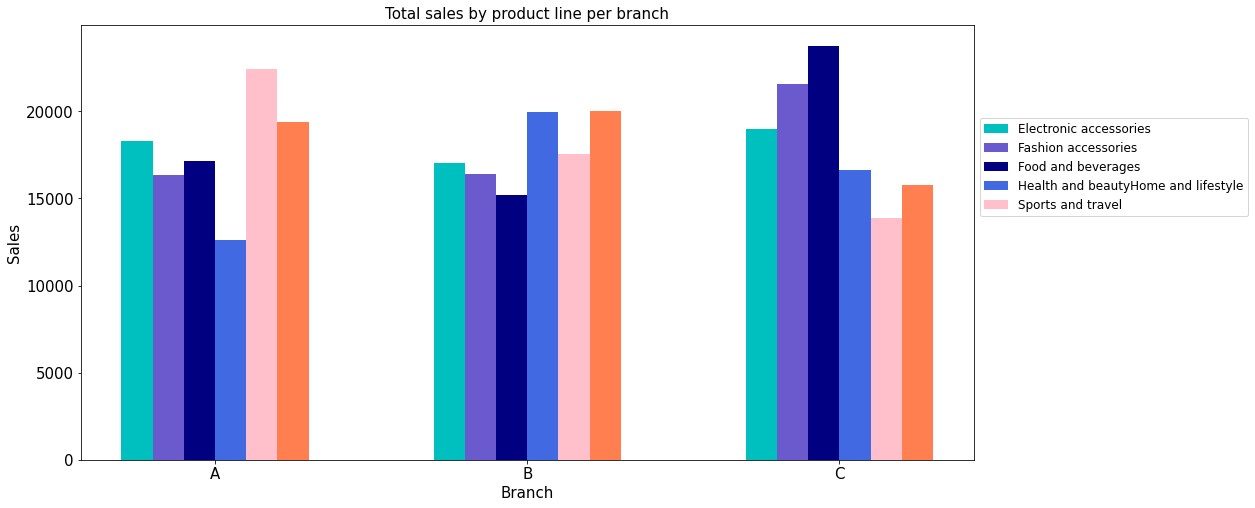

In [22]:
y_EA = product_line_pivot['Electronic accessories']
y_FA = product_line_pivot['Fashion accessories']
y_FB = product_line_pivot['Food and beverages']
y_HB = product_line_pivot['Health and beauty']
y_HL = product_line_pivot['Home and lifestyle']
y_ST = product_line_pivot['Sports and travel']

xlabels = product_line_pivot.branch # labels
x = np.arange(len(xlabels)) # label locations
bar_width = 0.1 # width of the bars

# Plotting individual bars
fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x, y_EA, bar_width, color = 'c', label='Member')
rects2 = ax.bar(x + 0.1, y_FA, bar_width, color = 'slateblue', label='Normal')
rects3 = ax.bar(x + 0.2, y_FB, bar_width, color = 'navy', label='Normal')
rects4 = ax.bar(x + 0.3, y_HB, bar_width, color = 'royalblue', label='Normal')
rects5 = ax.bar(x + 0.4, y_HL, bar_width, color = 'pink', label='Normal')
rects6 = ax.bar(x + 0.5, y_ST, bar_width, color = 'coral', label='Normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales', fontsize=15)
ax.set_xlabel('Branch', fontsize=15)
ax.set_title('Total Sales by product line and branch')
ax.set_xticks(x + (bar_width * 5) / 2)
ax.set_xticklabels(xlabels, fontsize=15)
plt.yticks(fontsize=15)

ax.legend()

# bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((rects1, rects2, rects3, rects4, rects5, rects6), 
          ('Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty'
          'Home and lifestyle', 'Sports and travel'), bbox_to_anchor = (1.0, 0.8), fontsize = 12)

plt.title('Total sales by product line per branch', fontsize = 15, y = 1.0)
plt.tight_layout
plt.savefig('product_line_sales')

In [23]:
 #grouping by branch to see which branch had the highest average customer rating. Branch C had the highest rating by a small
#margin and this branch also generated the most sales

# Table showing which branch had the highest average customer rating
customer_rating = sales.groupby('branch').customer_rating.mean().round(1).to_frame().reset_index()
customer_rating

,branch,customer_rating
0,A,7.0
1,B,6.8
2,C,7.1


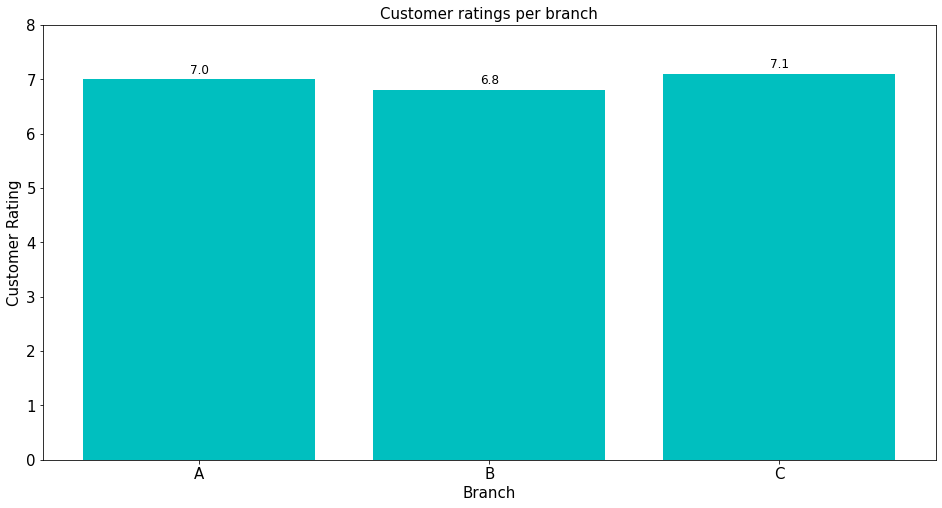

In [24]:
plt.figure(figsize=(16, 8))
ax = plt.subplot()

rects = ax.bar(customer_rating.branch, customer_rating.customer_rating, color='c')
ax.set_ylabel('Customer Rating', fontsize=15)
ax.set_xlabel('Branch', fontsize=15)
ax.set_title('Customer ratings by branch')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_ylim(0,8)

# label the customer ratings for each bar  
label(rects)

plt.title('Customer ratings per branch', fontsize = 15, y = 1.0)
plt.tight_layout
plt.savefig('customer_rating')

## Data Preparation 

In [25]:
# dropping unnecessary columns
sales = sales.drop(['invoice_id', 'city', 'date', 'time'], axis = 1)

In [26]:
# converting categorical variables to integers using get_dummies
sales_prep = pd.get_dummies(sales)
sales_prep.head()

,unit_price,quantity,tax_5%,total_price,cost_of_goods_sold,gross_margin_percentage,gross_income,customer_rating,branch_A,branch_B,...,gender_Male,product_line_Electronic accessories,product_line_Fashion accessories,product_line_Food and beverages,product_line_Health and beauty,product_line_Home and lifestyle,product_line_Sports and travel,payment_method_Cash,payment_method_Credit card,payment_method_Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0,0,...,0,1,0,0,0,0,0,1,0,0
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,1,0,...,1,0,0,0,0,1,0,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,1,0,...,1,0,0,0,1,0,0,0,0,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,1,0,...,1,0,0,0,0,0,1,0,0,1


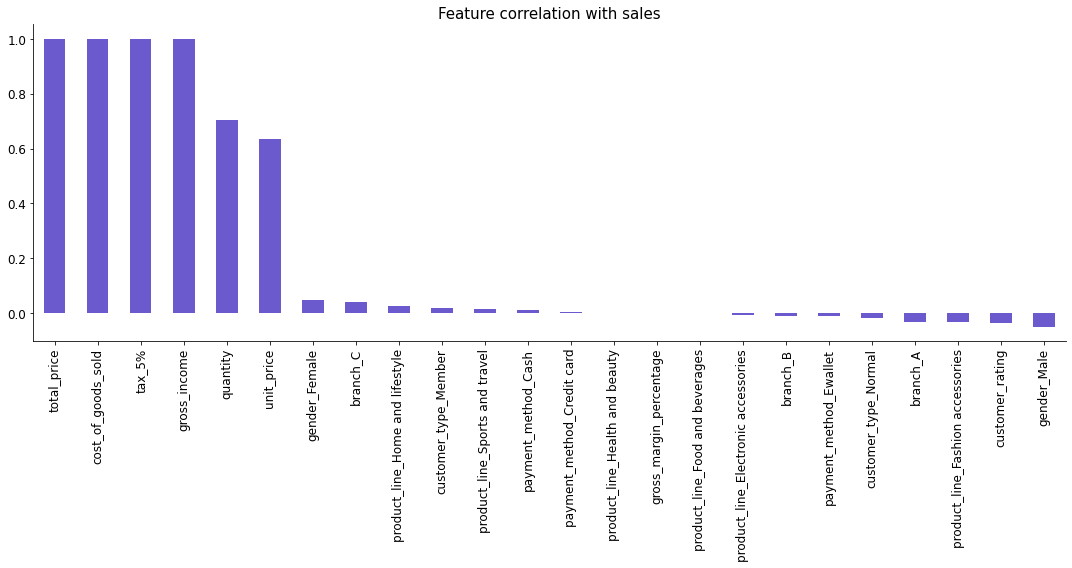

In [27]:
# plot correlations between the sales target feature and all other variables
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()

# corr() is used to find the pairwise correlation of all columns in the dataframe
sales_prep.corr()['total_price'].sort_values(ascending=False).plot(kind='bar', color='slateblue')
plt.title('Feature correlation with sales', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('sales_corr')

In [28]:
# cost_of_goods_sold, tax_5% and gross_income have a perfect positive correlation with sales
# and will therefore lead to multicollinearity - dropping these features will remove overfitting/high variance

sales_prep = sales_prep.drop(['cost_of_goods_sold', 'tax_5%', 'gross_income'], axis = 1)
sales_prep.head()

,unit_price,quantity,total_price,gross_margin_percentage,customer_rating,branch_A,branch_B,branch_C,customer_type_Member,customer_type_Normal,...,gender_Male,product_line_Electronic accessories,product_line_Fashion accessories,product_line_Food and beverages,product_line_Health and beauty,product_line_Home and lifestyle,product_line_Sports and travel,payment_method_Cash,payment_method_Credit card,payment_method_Ewallet
0,74.69,7,548.9715,4.761905,9.1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,15.28,5,80.2200,4.761905,9.6,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,46.33,7,340.5255,4.761905,7.4,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
3,58.22,8,489.0480,4.761905,8.4,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,86.31,7,634.3785,4.761905,5.3,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


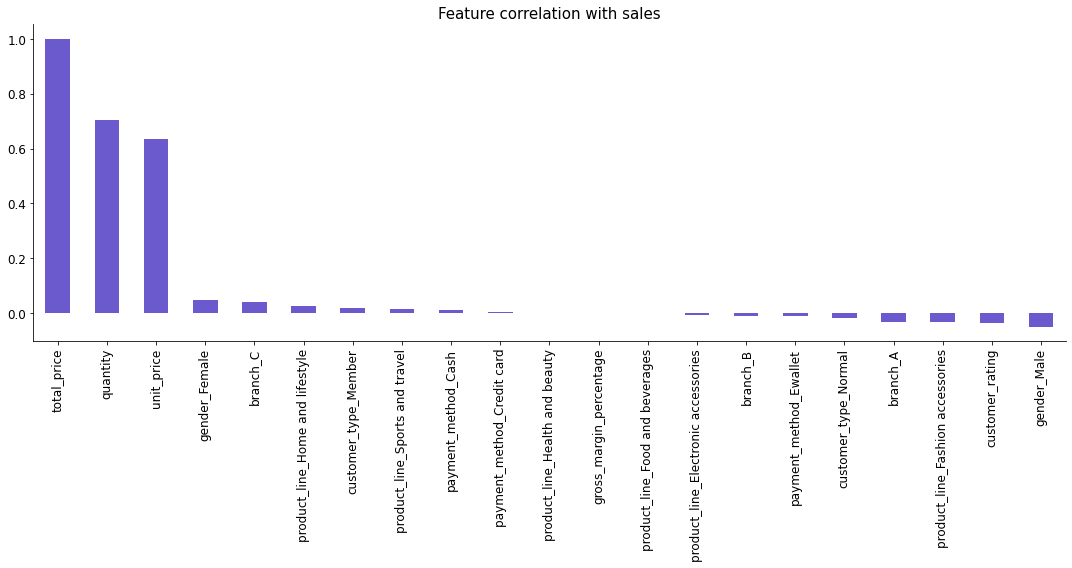

In [29]:
# plot correlations between the sales target feature and all other variables
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()

sales_prep.corr()['total_price'].sort_values(ascending=False).plot(kind='bar', color='slateblue')
plt.title('Feature correlation with sales', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('sales_corr')

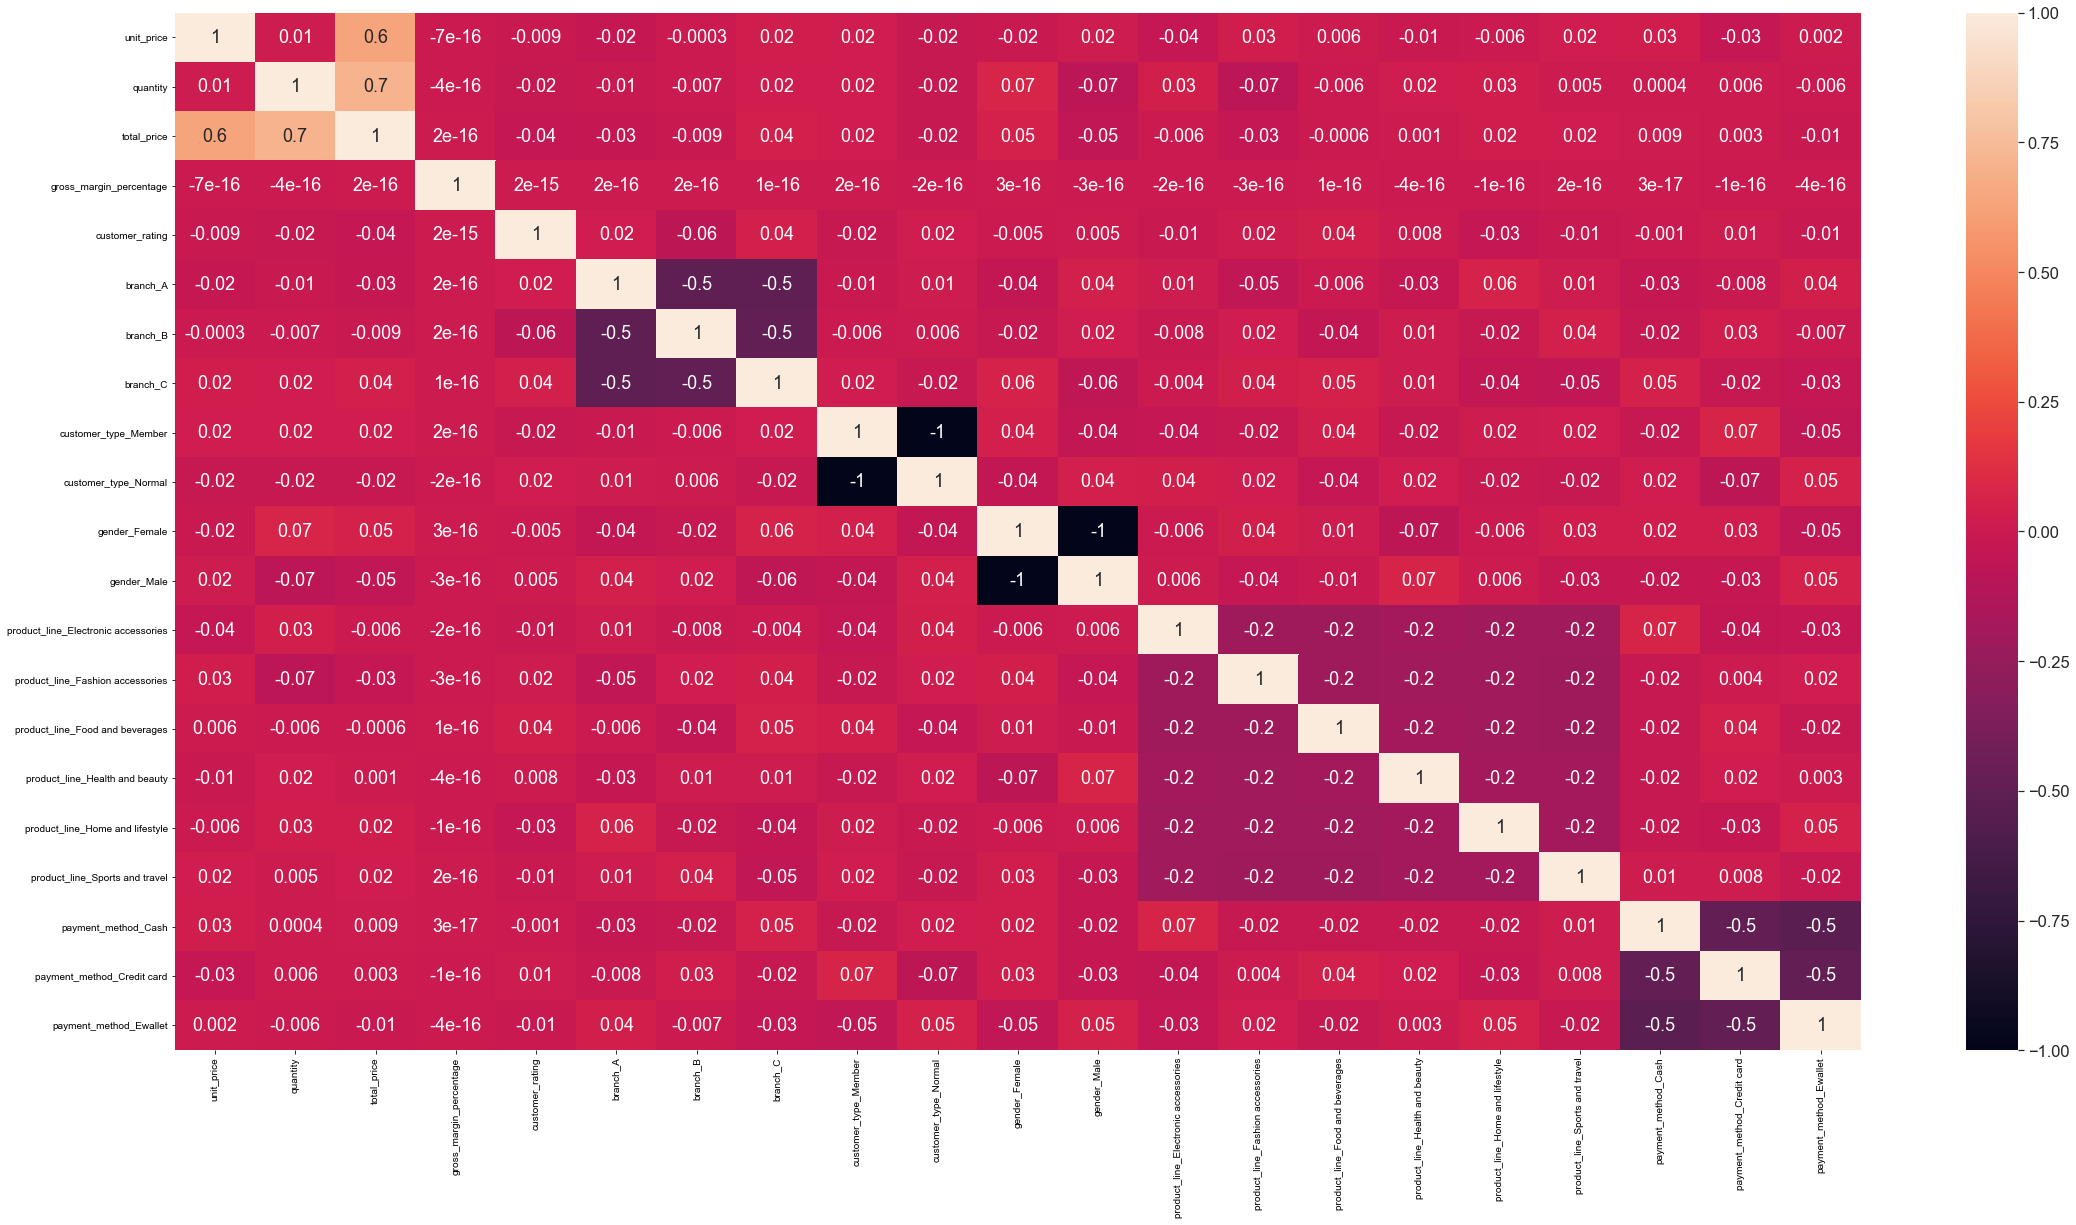

In [30]:
# plot correlations on a heatmap
fig, ax = plt.subplots(figsize=(30,15))
plt.tight_layout()
sns.set(font_scale=1.5)
sns.heatmap(sales_prep.corr(), annot=True, fmt='.1g')
plt.savefig('heatmap')

#### Numeric Scaling

In [31]:
# Save column names into a list to reassign to scaled dataframe as column information will be lost
sales_columns = sales_prep.columns

# MinMaxScaler instance
scaler = MinMaxScaler()

# fit_transform the scaler to the data and convert to dataframe
sales_prep = pd.DataFrame(scaler.fit_transform(sales_prep))

# re-assign original column names to fitted data
sales_prep.columns = sales_columns

sales_prep.head()

,unit_price,quantity,total_price,gross_margin_percentage,customer_rating,branch_A,branch_B,branch_C,customer_type_Member,customer_type_Normal,...,gender_Male,product_line_Electronic accessories,product_line_Fashion accessories,product_line_Food and beverages,product_line_Health and beauty,product_line_Home and lifestyle,product_line_Sports and travel,payment_method_Cash,payment_method_Credit card,payment_method_Ewallet
0,0.718847,0.666667,0.521616,0.0,0.850000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.057855,0.444444,0.067387,0.0,0.933333,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.403316,0.666667,0.319628,0.0,0.566667,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.535603,0.777778,0.463549,0.0,0.733333,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.848131,0.666667,0.604377,0.0,0.216667,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [63]:
# Split data into features and target
X = sales_prep.drop('total_price', axis=1)
y = sales_prep.total_price

In [64]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [65]:
print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (700, 20)
X_test.shape: (300, 20)
y_train.shape: (700,)
y_test.shape: (300,)


## Linear Regression

In [58]:
# Fitting the Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

In [59]:
# Let’s look at the training set and test set performance
print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.89


In [60]:
# Using polynomial features together with a linear regression model yields the classical
# model of polynomial regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# Comparing the number of features
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (700, 20)
X_train_poly.shape: (700, 231)


In [61]:
# Compare the performance using Linear Regression on the data with and without interactions:
print("Score without interactions: {:.3f}".format(reg.score(X_test, y_test)))
reg = LinearRegression().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(reg.score(X_test_poly, y_test)))

Score without interactions: 0.886
Score with interactions: 1.000


In [66]:
# Clearly, the interactions and polynomial features gave us a good boost in performance.
# When using a more complex model like random forest we see the following performance
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print("Score without interactions: {:.3f}".format(
 rf.score(X_test, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.998
Score with interactions: 0.999
